In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d arjuntejaswi/plant-village

 98% 321M/329M [00:08<00:00, 79.4MB/s]
100% 329M/329M [00:08<00:00, 41.7MB/s]


In [6]:
!unzip plant-village.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Cur

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [8]:
import os
for dirname, _, filenames in os.walk('./input/PlantVillage/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #disable debug logs

In [10]:
dir = os.listdir('/content/PlantVillage')
for filename in dir:
  print(filename)

Tomato_Early_blight
Tomato_Late_blight
Potato___healthy
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_Septoria_leaf_spot
Potato___Early_blight
Tomato_Bacterial_spot
Tomato_healthy
Tomato_Leaf_Mold
Tomato__Tomato_mosaic_virus
Pepper__bell___Bacterial_spot
Tomato_Spider_mites_Two_spotted_spider_mite
Pepper__bell___healthy
Tomato__Target_Spot
Potato___Late_blight


In [11]:
!cp -rf /content/PlantVillage/Tomato_Leaf_Mold ./Tomato_Leaf_Mold

In [12]:
!cp -rf /content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus ./Tomato__Tomato_YellowLeaf__Curl_Virus

In [13]:
!cp -rf /content/PlantVillage/Tomato_Bacterial_spot ./Tomato_Bacterial_spot

In [14]:
!cp -rf /content/PlantVillage/Tomato_healthy ./Tomato_healthy

In [15]:
!cp -rf /content/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite ./Tomato_Spider_mites_Two_spotted_spider_mite

In [16]:
!cp -rf /content/PlantVillage/Tomato_Early_blight ./Tomato_Early_blight

In [17]:
!cp -rf /content/PlantVillage/Tomato__Target_Spot ./Tomato__Target_Spot

In [18]:
!cp -rf /content/PlantVillage/Tomato_Late_blight ./Tomato_Late_blight

In [19]:
!cp -rf /content/PlantVillage/Tomato__Tomato_mosaic_virus ./Tomato__Tomato_mosaic_virus

In [20]:
!cp -rf /content/PlantVillage/Tomato_Septoria_leaf_spot ./Tomato_Septoria_leaf_spot

In [26]:
Current_Dir = '/content/new'
dataset_dir = pathlib.Path(Current_Dir)
print(dataset_dir)

/content/new


In [27]:
Image_Size = 50
Batch_Size = 50
Channels = 3
EPOCHS = 50

In [28]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
dataset_dir,
shuffle=True,
image_size=(Image_Size, Image_Size),
batch_size=Batch_Size
)

Found 3362 files belonging to 2 classes.


In [29]:
class_names=dataset.class_names
print(class_names)
print(len(class_names))

['Tomato_Septoria_leaf_spot', 'Tomato_healthy']
2


In [30]:
len(dataset)

68

In [31]:
for images, labels in dataset.take(1):
    print(images[0].numpy())
    print(images[0].shape)
    print(labels.numpy())  

[[[177.37921 171.37921 185.37921]
  [155.8856  149.8856  163.8856 ]
  [145.61804 139.61804 153.61804]
  ...
  [176.81796 171.81796 178.81796]
  [198.83382 193.83382 200.83382]
  [169.70018 164.70018 171.70018]]

 [[141.76    135.76    149.76   ]
  [136.80762 130.80762 144.80762]
  [151.00603 145.00603 159.00603]
  ...
  [196.60403 191.60403 198.60403]
  [197.69656 192.69656 199.69656]
  [181.66344 176.66344 183.66344]]

 [[135.30203 129.30203 143.30203]
  [143.75198 137.75198 151.75198]
  [149.67006 143.67006 157.67006]
  ...
  [198.22998 193.22998 200.22998]
  [202.31177 197.31177 204.31177]
  [179.90184 174.90184 181.90184]]

 ...

 [[144.99199 141.99199 160.99199]
  [146.656   143.656   162.656  ]
  [150.4     147.4     166.4    ]
  ...
  [200.43999 197.43999 206.43999]
  [195.70807 192.70807 201.70807]
  [204.66801 201.66801 210.66801]]

 [[160.94923 157.94923 176.94923]
  [147.81721 144.81721 163.81721]
  [156.85396 153.85396 172.85396]
  ...
  [202.26396 199.26396 208.26396]
  [1

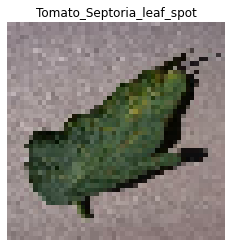

In [32]:
# Explore an Image and its Label
for images, labels in dataset.take(1):
    plt.imshow(images[0].numpy().astype('uint8'))
    plt.axis('off')
    plt.title(class_names[labels[0].numpy()])

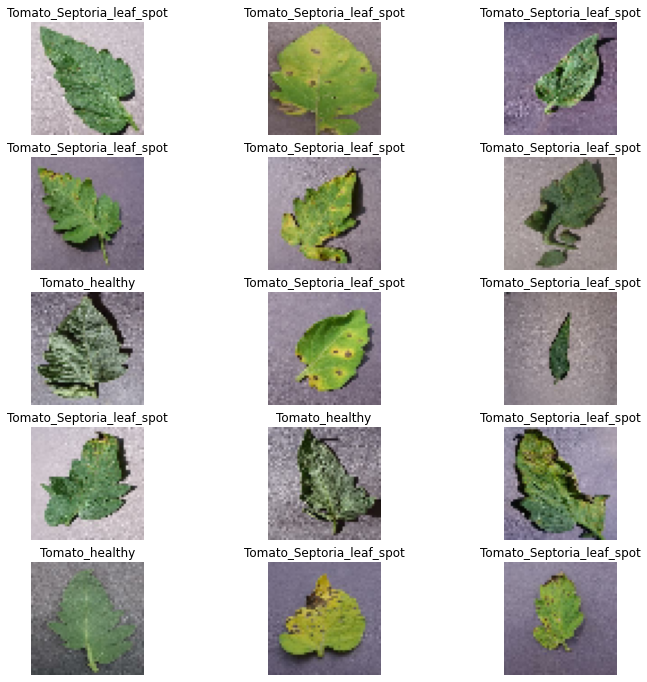

In [33]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in dataset.take(1):
    for i in range(15):
        plt.subplot(5,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [34]:
def split_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 10)
        
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [35]:
train, val, test = split_dataset(dataset)
len(train),len(val),len(test)

(54, 6, 8)

In [36]:
# train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# val = val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# test = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [37]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size, Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [38]:
# Data augmentation 
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(factor = 0.2)
])

In [39]:
input_shape=(Image_Size, Image_Size, Channels)
n_classes=2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)#include top -> last layer will not execute
base_model.trainable = False ## Not trainable weights

base_model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                              

In [40]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
# droupout_1 = layers.Dropout(0.3)
dense_layer_2 = layers.Dense(20, activation='relu')
# droupout_2 = layers.Dropout(0.3)
prediction_layer = layers.Dense(2, activation='sigmoid')

In [41]:
model = models.Sequential([
    resize_and_rescale, 
    data_augmentation,
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [42]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [43]:
vgghistory = model.fit(
    train, 
    epochs = 50, 
    batch_size = Batch_Size, 
    verbose = 1, 
    validation_data = val)

Epoch 1/50
54/54 [==============================] - 21s 145ms/step - loss: 0.3062 - accuracy: 0.8948 - val_loss: 0.1644 - val_accuracy: 0.9633
Epoch 2/50
54/54 [==============================] - 7s 93ms/step - loss: 0.1404 - accuracy: 0.9452 - val_loss: 0.0706 - val_accuracy: 0.9833
Epoch 3/50
54/54 [==============================] - 7s 95ms/step - loss: 0.0986 - accuracy: 0.9633 - val_loss: 0.0488 - val_accuracy: 0.9900
Epoch 4/50
54/54 [==============================] - 7s 95ms/step - loss: 0.1036 - accuracy: 0.9609 - val_loss: 0.0924 - val_accuracy: 0.9700
Epoch 5/50
54/54 [==============================] - 7s 95ms/step - loss: 0.0877 - accuracy: 0.9643 - val_loss: 0.0485 - val_accuracy: 0.9833
Epoch 6/50
54/54 [==============================] - 7s 95ms/step - loss: 0.0819 - accuracy: 0.9677 - val_loss: 0.0946 - val_accuracy: 0.9733
Epoch 7/50
54/54 [==============================] - 7s 95ms/step - loss: 0.0800 - accuracy: 0.9715 - val_loss: 0.1196 - val_accuracy: 0.9633
Epoch 8/50


In [44]:
pred = model.predict(test)
pred
results = model.evaluate(val)

6/6 [==============================] - 2s 29ms/step - loss: 0.0366 - accuracy: 0.9900


2/2 [==============================] - 0s 12ms/step
[[158   4]
 [  0 138]]


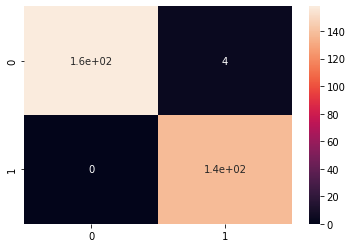

In [45]:
y_pred = []  # store predicted labels
y_true = []  # store true labels
from sklearn.metrics import confusion_matrix
# iterate over the dataset
for image_batch, label_batch in val:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
# for j in range (len(y_pred)):
#   xx = xx + y_pred[j]
import seaborn as sns
# for i in range (len(y_true)):
#   res = confusion_matrix(y_true[i], y_pred[i])
#   print(confusion_matrix(y_true[i], y_pred[i]))
y_pred2 = np.concatenate( y_pred, axis=0 )
y_true2 = np.concatenate( y_true, axis=0 )
res2 = confusion_matrix(y_true2, y_pred2)
print(res2)
sns.heatmap(res2, annot=True)




[2 1 0]


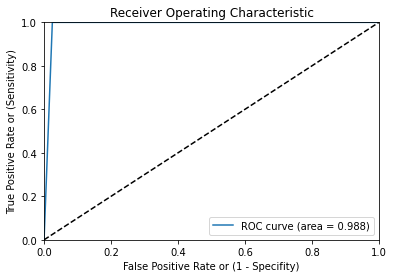

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_true2, y_pred2)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
print(thresholds)

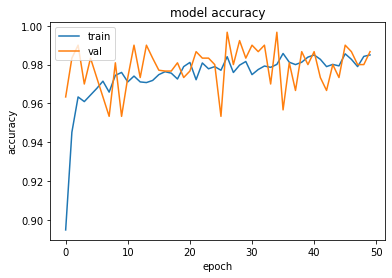

In [47]:
plt.plot(vgghistory.history['accuracy'])
plt.plot(vgghistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

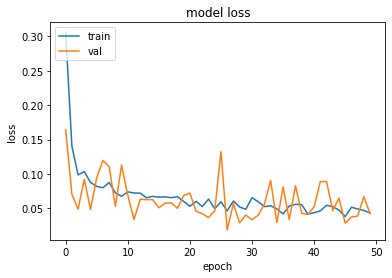

{'loss': [0.3061612546443939, 0.14044415950775146, 0.0985521674156189, 0.10358040034770966, 0.08769021183252335, 0.08191058784723282, 0.07998009026050568, 0.08775115013122559, 0.07244064658880234, 0.06757345795631409, 0.07401071488857269, 0.0722857266664505, 0.07214868813753128, 0.06532073765993118, 0.0673970878124237, 0.06633567810058594, 0.0666494145989418, 0.06557818502187729, 0.06698579341173172, 0.06007537245750427, 0.05300507694482803, 0.060147807002067566, 0.05257340148091316, 0.06350219994783401, 0.04950907826423645, 0.059566427022218704, 0.046191707253456116, 0.060622625052928925, 0.05192584916949272, 0.04867595434188843, 0.06561028957366943, 0.0595615990459919, 0.0524824820458889, 0.05375908687710762, 0.04923584684729576, 0.04188636690378189, 0.0533757321536541, 0.0558752678334713, 0.05533178523182869, 0.04177793860435486, 0.043644119054079056, 0.04637588933110237, 0.054472800344228745, 0.0525435209274292, 0.04741313308477402, 0.037966545671224594, 0.05162622779607773, 0.0490

In [48]:
plt.plot(vgghistory.history['loss'])
plt.plot(vgghistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print(vgghistory.history)